<a href="https://colab.research.google.com/github/Maratinhos/hw/blob/master/Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
import pandas as pd
%matplotlib inline

In [2]:
file = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c titanic

In [0]:
!kaggle competitions download -c titanic

In [0]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin2,rod
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


In [0]:
df['Sex'] = df['Sex'].replace('male', 0)
df['Sex'] = df['Sex'].replace('female', 1)
df['Embarked'] = df['Embarked'].replace('S', 0)
df['Embarked'] = df['Embarked'].replace('C', 1)
df['Embarked'] = df['Embarked'].replace('Q', 2)
df['Cabin2'] = pd.isnull(df['Cabin'])
df['Cabin2'] = df['Cabin2'].astype(int)
df['rod'] = df['SibSp'] + df['Parch']

df_test['Sex'] = df_test['Sex'].replace('male', 0)
df_test['Sex'] = df_test['Sex'].replace('female', 1)
df_test['Embarked'] = df_test['Embarked'].replace('S', 0)
df_test['Embarked'] = df_test['Embarked'].replace('C', 1)
df_test['Embarked'] = df_test['Embarked'].replace('Q', 2)
df_test['Cabin2'] = pd.isnull(df_test['Cabin'])
df_test['Cabin2'] = df_test['Cabin2'].astype(int)
df_test['rod'] = df_test['SibSp'] + df_test['Parch']

In [0]:
df2 = df[['Pclass', 'Sex', 'Age', 'rod', 'Fare', 'Embarked', 'Cabin2', 'Survived']]

In [0]:
df3 = df2.dropna()

In [0]:
x = df3[['Pclass', 'Sex', 'Age', 'rod', 'Fare', 'Embarked', 'Cabin2']]
y = df3['Survived']

x_test = df_test[['Pclass', 'Sex', 'Age', 'rod', 'Fare', 'Embarked', 'Cabin2']]

In [0]:
x = x.fillna(x.mean())

x_test = x_test.fillna(x_test.mean())

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.1, shuffle=True)

In [0]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.fit_transform(x_val)

x_test_scaled = scaler.fit_transform(x_test)

In [0]:
x_train_scaled = x_train_scaled.astype(np.float32)
x_val_scaled = x_val_scaled.astype(np.float32)
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)

x_test_scaled = x_test_scaled.astype(np.float32)

In [0]:
x_train_scaled = np.array(x_train_scaled)
x_val_scaled = np.array(x_val_scaled)
y_train = np.array(y_train)
y_val = np.array(y_val)

x_test_scaled = np.array(x_test_scaled)

In [0]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(7,)),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dropout(0.25),
    Dense(2, activation='relu'),
    #BatchNormalization(),
    #Dropout(0.2),
    #Dense(1024, activation='relu'),
    #BatchNormalization(),
    #Dropout(0.01),
    #Dense(1024, activation='relu'),
    #BatchNormalization(),
    #Dropout(0.01),
    #Dense(512, activation='relu'),
    #BatchNormalization(),
    #Dropout(0.01),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam', 
              loss='binary_crossentropy', 
              metrics = ['accuracy'])

checkpoint = ModelCheckpoint('kaggle-titanic.hdf5', monitor = 'val_acc', save_best_only = True, verbose = 1, mode = 'max')
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc', patience = 3, verbose = 1, factor = 0.3, min_lr = 0.1)
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1, restore_best_weights = True)

In [131]:
history = model.fit(x_train_scaled, 
                    y_train, 
                    batch_size = 128,
                    validation_data = (x_val_scaled, y_val), 
                    epochs = 100,
                    verbose = 1
                    #callbacks = [checkpoint, learning_rate_reduction, early_stopping]
                   )

Train on 640 samples, validate on 72 samples
Epoch 1/100
640/640 [==============================] - 2s 3ms/sample - loss: 0.6966 - acc: 0.4016 - val_loss: 0.6955 - val_acc: 0.3056
Epoch 2/100
640/640 [==============================] - 0s 58us/sample - loss: 0.6949 - acc: 0.4266 - val_loss: 0.6938 - val_acc: 0.3889
Epoch 3/100
640/640 [==============================] - 0s 51us/sample - loss: 0.6932 - acc: 0.4797 - val_loss: 0.6924 - val_acc: 0.6667
Epoch 4/100
640/640 [==============================] - 0s 54us/sample - loss: 0.6917 - acc: 0.5672 - val_loss: 0.6912 - val_acc: 0.6250
Epoch 5/100
640/640 [==============================] - 0s 58us/sample - loss: 0.6904 - acc: 0.6156 - val_loss: 0.6903 - val_acc: 0.6111
Epoch 6/100
640/640 [==============================] - 0s 53us/sample - loss: 0.6887 - acc: 0.6609 - val_loss: 0.6896 - val_acc: 0.6111
Epoch 7/100
640/640 [==============================] - 0s 61us/sample - loss: 0.6883 - acc: 0.6484 - val_loss: 0.6888 - val_acc: 0.6250
Epoc

In [0]:
model.load_weights('kaggle-titanic.hdf5')

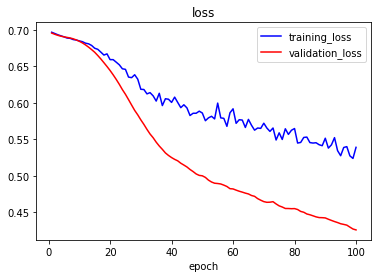

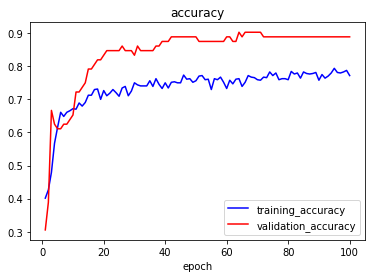

In [133]:
# Training plots
epochs = [i for i in range(1, len(history.history['loss'])+1)]

plt.plot(epochs, history.history['loss'], color='blue', label="training_loss")
plt.plot(epochs, history.history['val_loss'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(epochs, history.history['acc'], color='blue', label="training_accuracy")
plt.plot(epochs, history.history['val_acc'], color='red',label="validation_accuracy")
plt.legend(loc='best')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

In [0]:
y_pred = model.predict(x_test_scaled)
y_final = (y_pred > 0.5).astype(int).reshape(df_test.shape[0])
    
output = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_final})
output.to_csv('submission.csv', index=False)

In [36]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [37]:
output.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.322967
std,120.810458,0.468170
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [38]:
!kaggle competitions submit -c titanic -f submission.csv -m "sub #5"

100% 2.77k/2.77k [00:10<00:00, 270B/s]
Successfully submitted to Titanic: Machine Learning from Disaster